# Definition

미국의 경기 침체 (Recession)기간을 확인하고, 사용 가능한 데이터로 변환한다.
  - 경기 침체 기간에 대한 그래프를 확인할 수 있다.

## package 세팅 및 데이터 세팅

### 패키지

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from pathlib import Path

### help function

In [ ]:
def replace_years_to_whs(text):
   return text.replace('years', 'year').replace('year', '.')

def replace_months_to_whs(text):
   return text.replace('months', 'month').replace('month', '')

def remove_whs(text):
   return text.replace(' ', '')

def convert_to_float(text):
  return np.float(text)

def cal_period_month(num):
  num_int = np.floor(num)
  return (num_int * 12) + (num- num_int)

def split_context_dash(text):
   return text.split('–')

def trax_to_time(text):
  return pd.to_datetime(text)

def delete_annot(text):
  return text.split('[')[0]


# def mk_dir(root_path):
#   dir = Path(root_path)   ##img_folder
#   file_path = dir
#   file_path.mkdir(parents=True, exist_ok=True)
#   return file_path

# def save_to_fig(file_path, file_name):
#   file_name =file_path/f'{file_name}.png'
#   plt.savefig(file_name, dpi=300, bbox_inches='tight')

### 데이터 준비

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States'
depression_data = pd.read_html(url)[2]
depression_data.set_index('Name', inplace=True)

In [ ]:
# depression_data.head()

,Period Range,Duration (months),Time since previous recession (months),Peak unemploy­ment,GDP decline (peak to trough),Characteristics
Name,,,,,,
Great Depression,Aug 1929–Mar 1933,3 years7 months,1 year9 months,21.3%(1932)[50]– 24.9%(1933)[51],−26.7%,A banking panic and a collapse in the money su...
Recession of 1937–1938,May 1937–June 1938,1 year1 month,4 years2 months,17.8%[50]–19.0%(1938)[57],−18.2%,The Recession of 1937 is only considered minor...
Recession of 1945,Feb 1945–Oct 1945,8 months,6 years8 months,5.2%[57](1946),−12.7%,The decline in government spending at the end ...
Recession of 1949,Nov 1948–Oct 1949,11 months,3 years1 month,7.9%(Oct 1949),−1.7%,The 1948 recession was a brief economic downtu...
Recession of 1953,July 1953–May 1954,10 months,3 years9 months,6.1%(Sep 1954),−2.6%,"After a post-Korean War inflationary period, m..."


In [ ]:
# depression_data.tail()

,Period Range,Duration (months),Time since previous recession (months),Peak unemploy­ment,GDP decline (peak to trough),Characteristics
Name,,,,,,
1981–1982 recession,July 1981–Nov 1982,1 year4 months,1 year,10.8%(Nov 1982),−2.7%,The Iranian Revolution sharply increased the p...
Early 1990s recession,July 1990–Mar 1991,8 months,7 years8 months,7.8%(June 1992),−1.4%,After the lengthy peacetime expansion of the 1...
Early 2000s recession,Mar 2001–Nov 2001,8 months,10 years,6.3%(June 2003),−0.3%,The 1990s were the longest period of economic ...
Great Recession,Dec 2007–June 2009[74][75],1 year6 months,6 years1 month,10.0%(October 2009)[76],−5.1%[77],The subprime mortgage crisis led to the collap...
COVID-19 recession,Feb 2020–April 2020 [80][81] [82],2 months,10 years8 months,14.7%(April 2020)[83],−19.2%[84],"In September 2019, the Federal Reserve had to ..."


In [ ]:
col1 =  ['Duration (months)','Time since previous recession (months)']
col2 = ['Period Range']
depression_data.loc[:, col1] = depression_data.loc[:, col1].dropna().applymap(replace_years_to_whs).applymap(replace_months_to_whs).applymap(remove_whs).applymap(convert_to_float).applymap(cal_period_month)
depression_data.loc[:, col2] = depression_data.loc[:, col2].dropna().applymap(delete_annot).applymap(split_context_dash) #.map(trax_to_time)
col = col1+ col2

# Recession 기간 분석

- 2000년 이후, 경기 침체는 짧고 경기 침체 사이의 기간은 길어지는 경향이 보인다.
- 이는 QE와 같은 통화 정책으로 시장에 적극적으로 개입하여 경기 침체를 막고자한 의지가 반영되는 것으로 보인다.

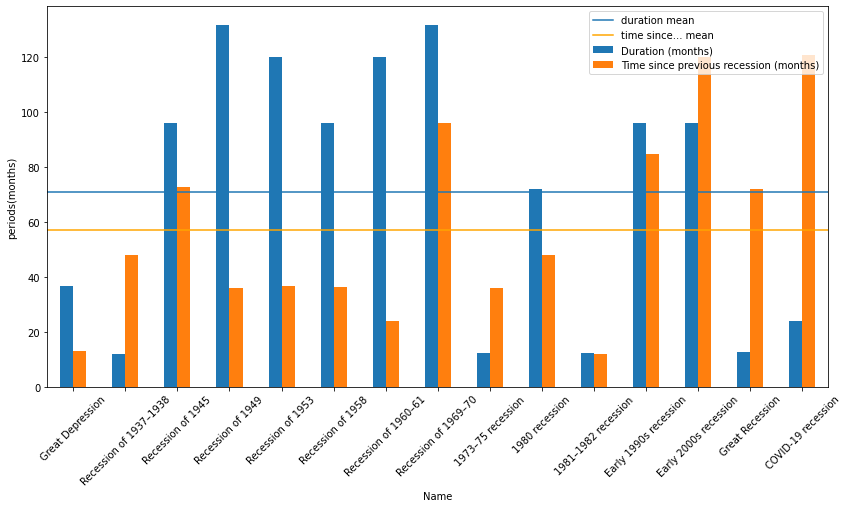

In [ ]:
depression_data.plot.bar(figsize=(14,7), rot=45)
plt.ylabel('periods(months)')
plt.axhline(y=71, label='duration mean' )
plt.axhline(y=57, label='time since... mean', color='orange' )
plt.legend(loc='best')

In [ ]:
depression_data.iloc[:, [1,2]].applymap(lambda x:np.float(x)).describe()
# 침체 기간의 평균 확인

,Duration (months),Time since previous recession (months)
count,15.000000,15.00000
mean,71.346667,57.14000
std,47.716707,35.60118
min,12.100000,12.00000
25%,18.300000,36.05000
50%,96.000000,48.10000
75%,108.000000,78.80000
max,132.000000,120.80000


---